# Introduction to trackintel

This tutorial will show you the most important functionalities of trackintel.

## Model

Trackintel is based on a hierachical data model. 
![title](../docs/assets/hierarchy.png)

The details are explained in [readme.md](https://github.com/mie-lab/trackintel/blob/master/README.md)

To get started, import the framework using the following command. In addition it is always useful to import also pandas and geopandas.

In [1]:
import trackintel as ti
import geopandas as gpd
import pandas as pd
import os

As a first step, the data that should be processed has to be importet. In this example we use a stored GEOJSON file, that contains raw positionfixes.

In [2]:
gdf = gpd.read_file('./data/positionfixes_tutorial.geojson')

This is the reccomended way to import data. Nevertheless it is also possible to read csv files directly using [read_positionfixes_csv](https://trackintel.readthedocs.io/en/latest/modules/io.html#csv-file-import).

The GeoDataFrame (gdf) imported by the GeoPandas read_file function is not yet in the correct format to be used by trackintel. If you try to call a trackintel function (e.g. plotting) on this GeoDataFrame, an error will occur. 

In [3]:
#gdf.as_positionfixes.plot()

gdf

,id,lat,lon,elevation,time,User,accuracy,geometry
0,0,40.008304,116.319876,149.9616,2008-10-24T02:09:59+00:00,0,None,POINT (116.31988 40.00830)
1,1,40.008413,116.319962,149.6568,2008-10-24T02:10:04+00:00,0,None,POINT (116.31996 40.00841)
2,2,40.007171,116.319458,-14.0208,2008-10-24T02:10:09+00:00,0,None,POINT (116.31946 40.00717)
3,3,40.007209,116.319484,-14.6304,2008-10-24T02:10:14+00:00,0,None,POINT (116.31948 40.00721)
4,4,40.007287,116.319590,-12.4968,2008-10-24T02:10:19+00:00,0,None,POINT (116.31959 40.00729)
...,...,...,...,...,...,...,...,...
239,239,40.008710,116.321586,24.9936,2008-10-24T02:46:31+00:00,0,None,POINT (116.32159 40.00871)
240,240,40.009134,116.321215,55.7784,2008-10-24T02:46:51+00:00,0,None,POINT (116.32121 40.00913)
241,241,40.009199,116.321111,28.0416,2008-10-24T02:46:56+00:00,0,None,POINT (116.32111 40.00920)
242,242,40.009215,116.321158,25.6032,2008-10-24T02:47:01+00:00,0,None,POINT (116.32116 40.00921)


To transform the GeoDataFrame into the correct format use the function [positionfixes_from_gpd](https://trackintel.readthedocs.io/en/latest/modules/io.html#geodataframe-import). The method allows to rename the columns, define an index column and define a timezone. If no timezone is defined, UTC is assumed.

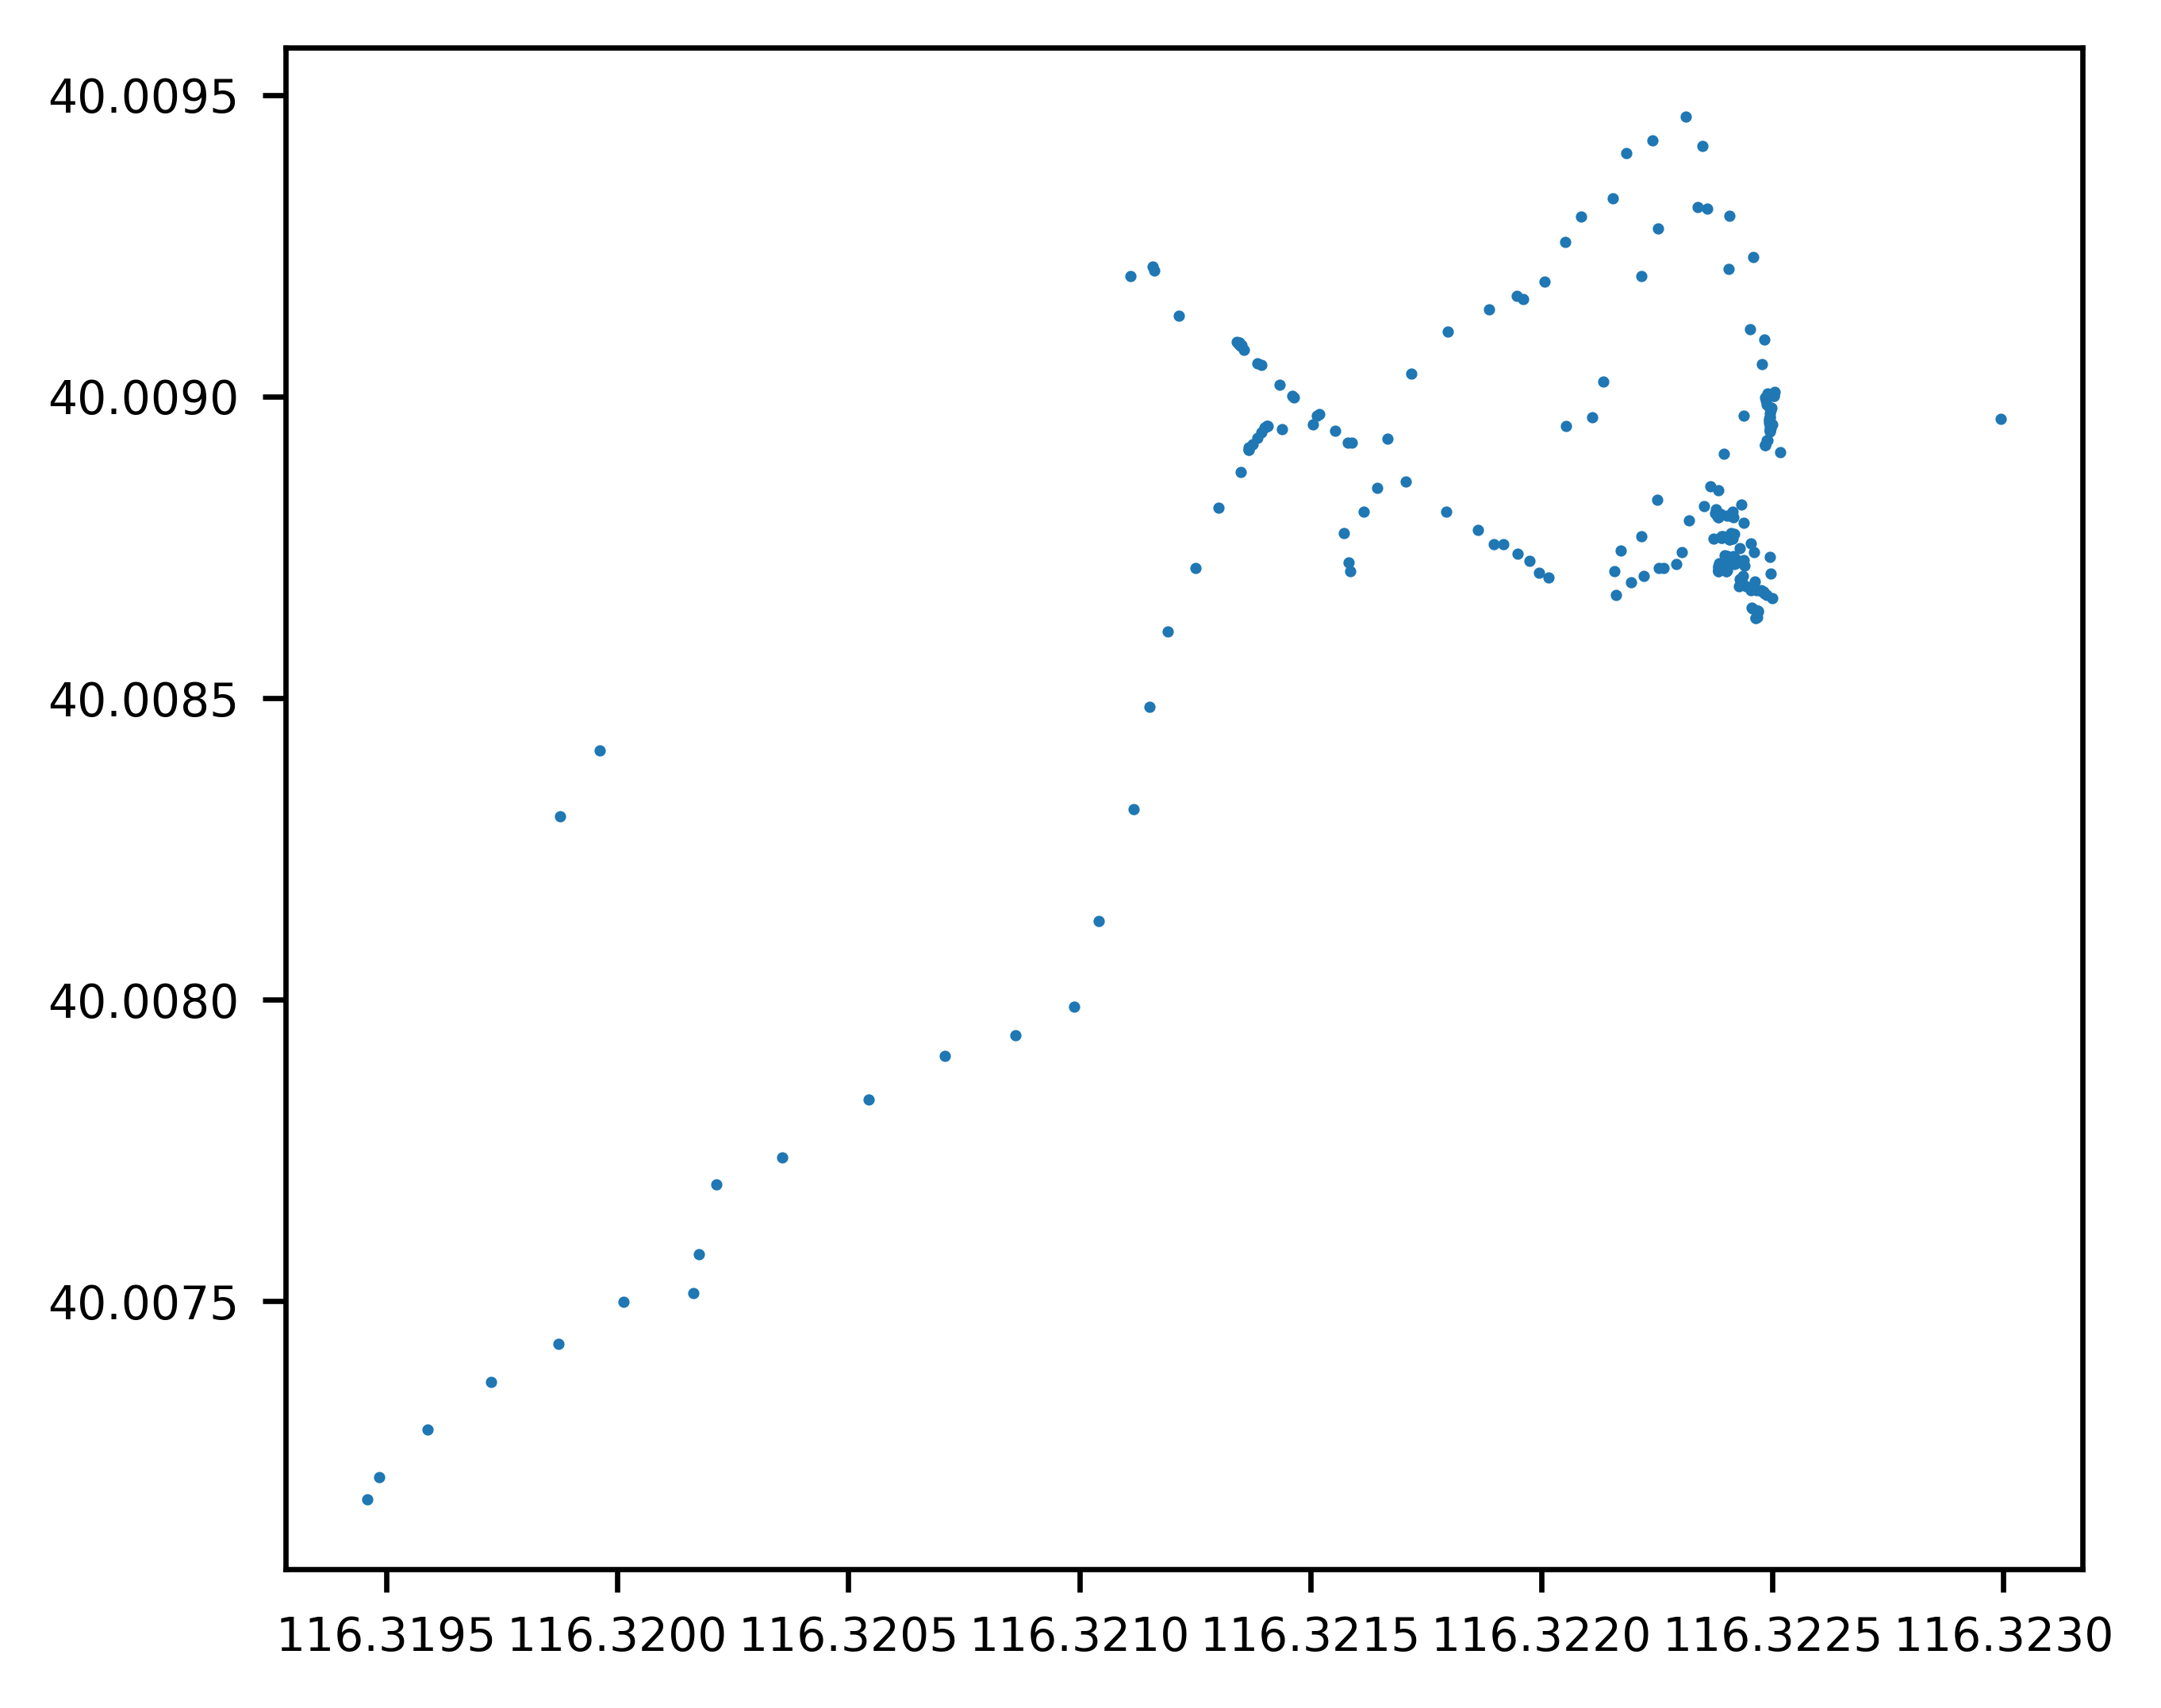

In [29]:
pfs = ti.io.from_geopandas.positionfixes_from_gpd(gdf, tz='UTC', 
                                                  mapper={'User':'user_id','time':'tracked_at', 'geometry':'geom'})
pfs.as_positionfixes.plot()

When the GeoDataFrame is once in the right format, all trackintel functions can be called using the accessor _as_positionfixes_ (as_triplegs, as_staypoints, ... for the other data types). In the next steps the staypoints and triplegs are generated.

In [5]:
pfs, stps = pfs.as_positionfixes.generate_staypoints(method='sliding', dist_threshold=25, time_threshold=5*60)

Each data type in the model has a plotting function. Let's vizualize the generated staypoints. To get a background map for bigger data sets, use plot_osm=True.

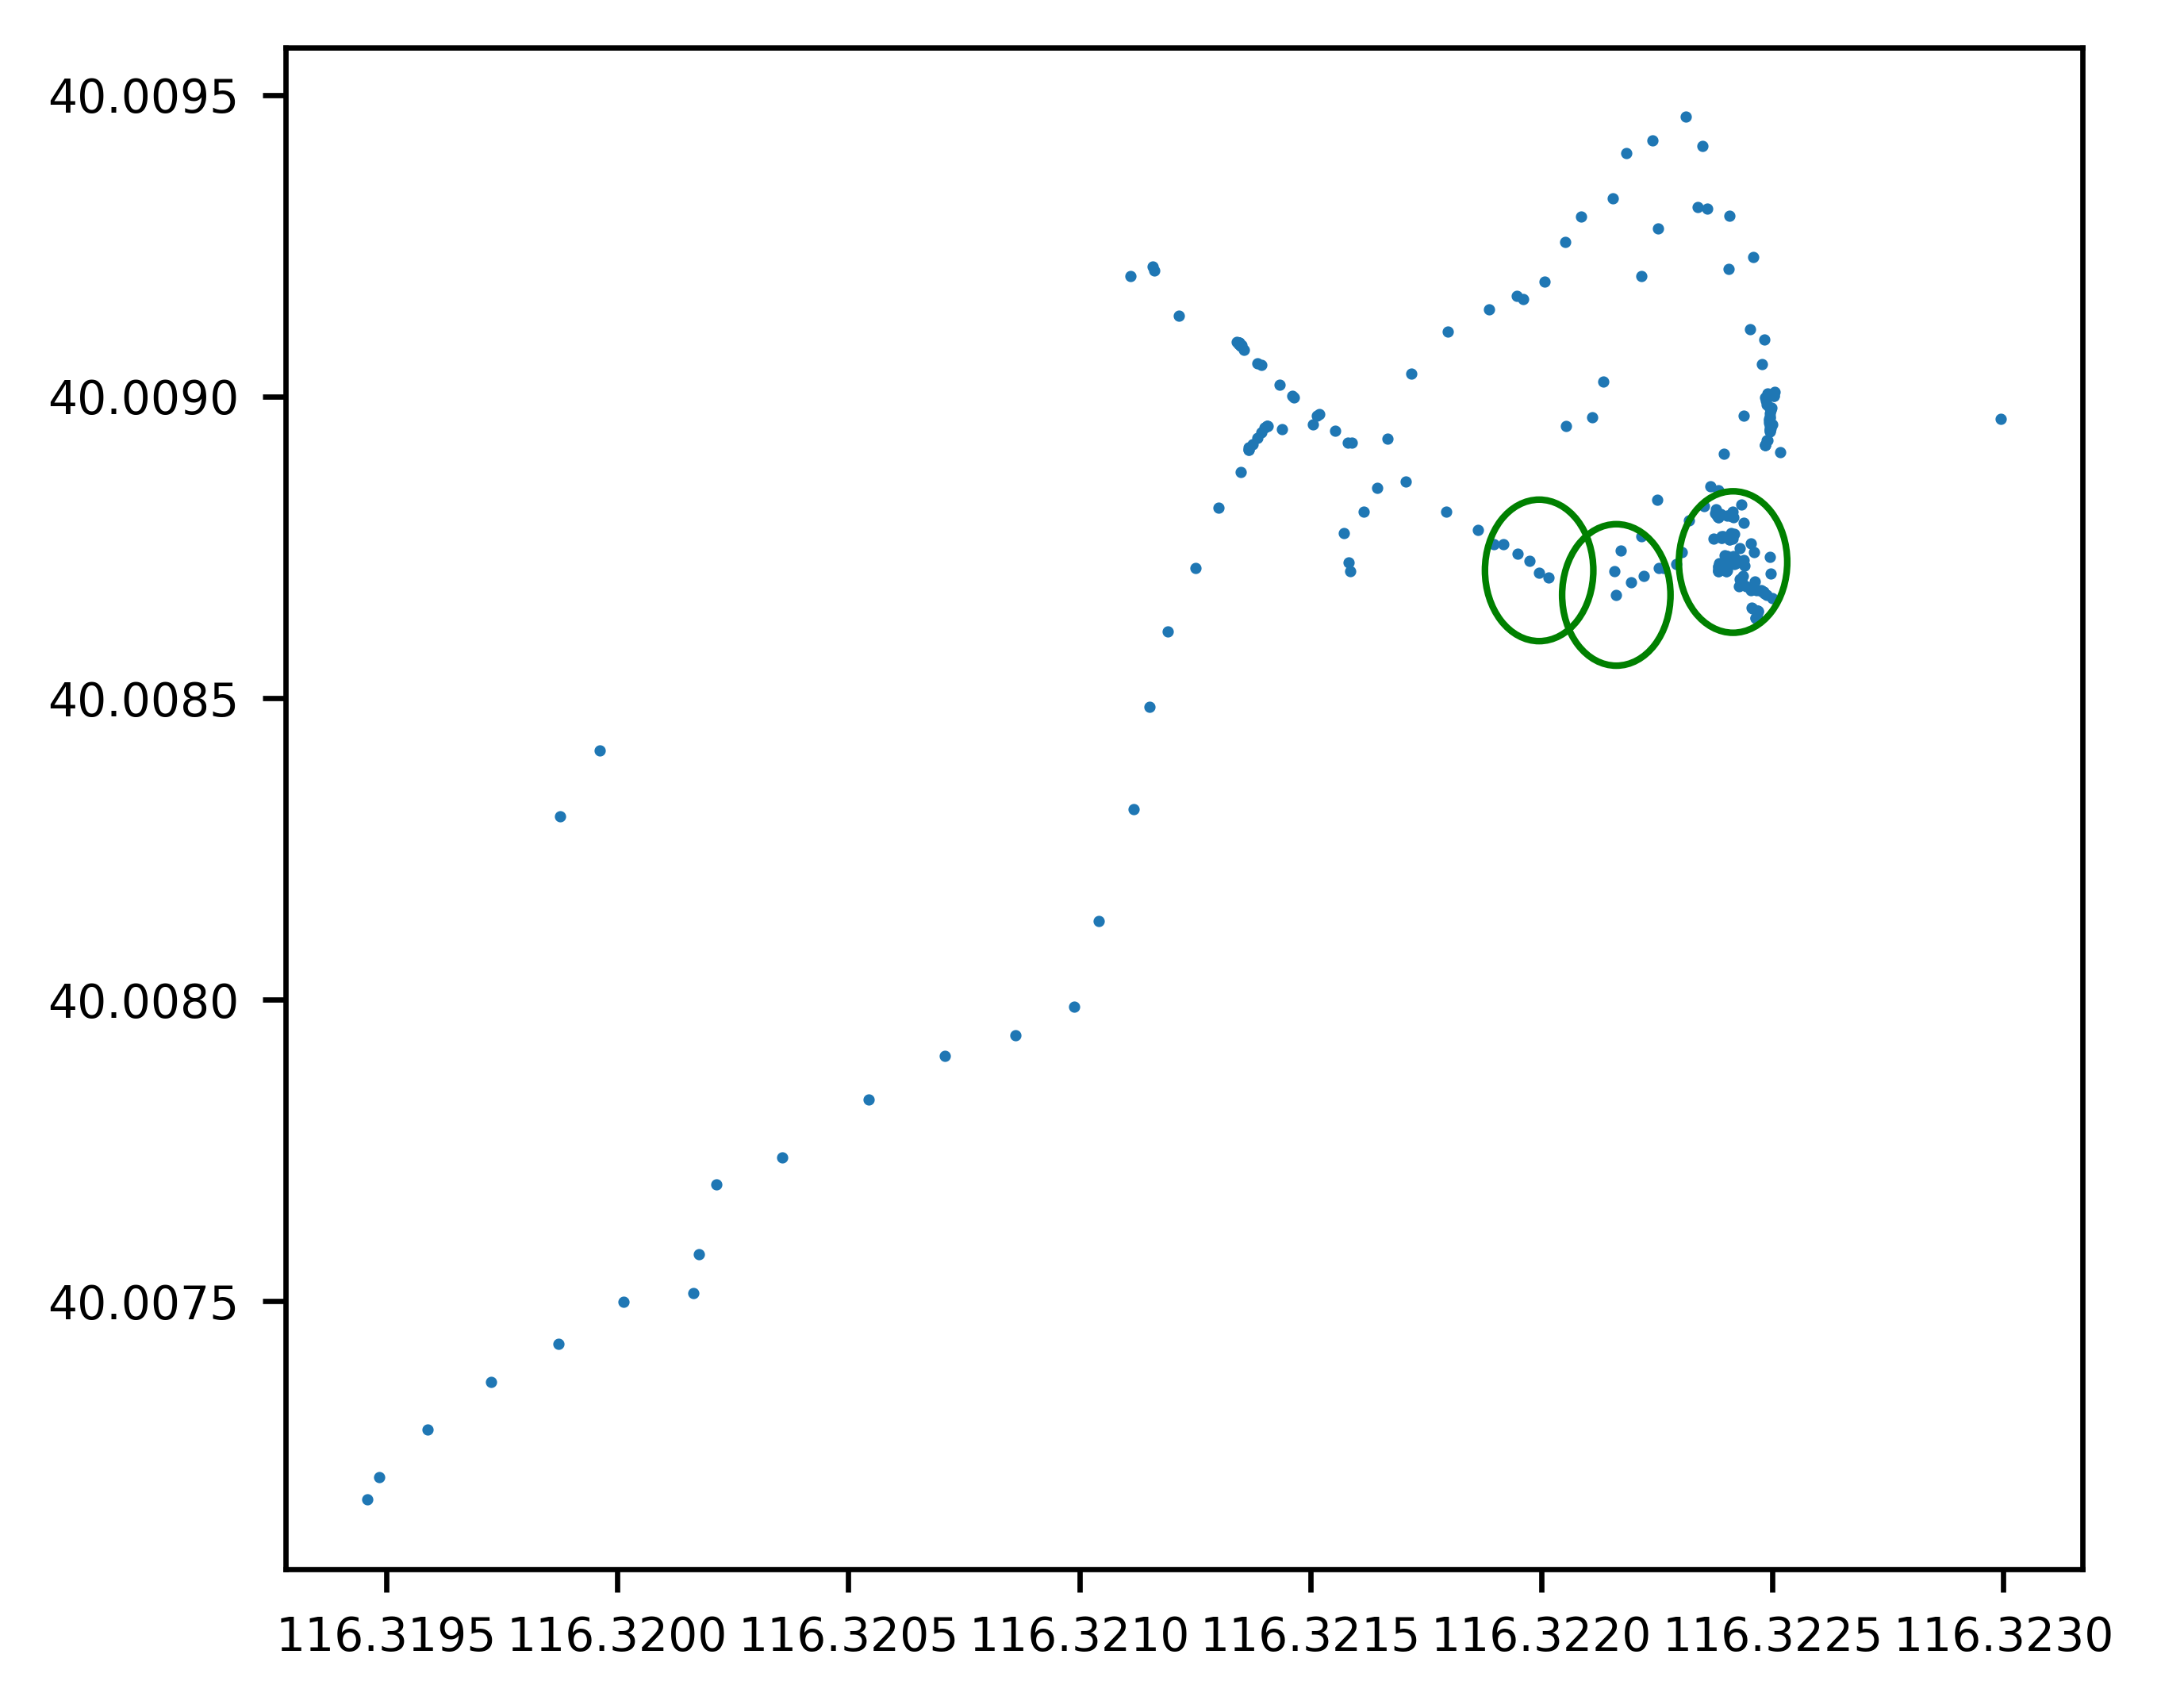

In [20]:
stps.as_staypoints.plot(positionfixes=pfs, radius=10)

In [16]:
pfs, tpls = pfs.as_positionfixes.generate_triplegs(stps, method='between_staypoints')

The generated staypoints and triplegs can be exported to csv files. Once stored, they can be re imported for further treatment.

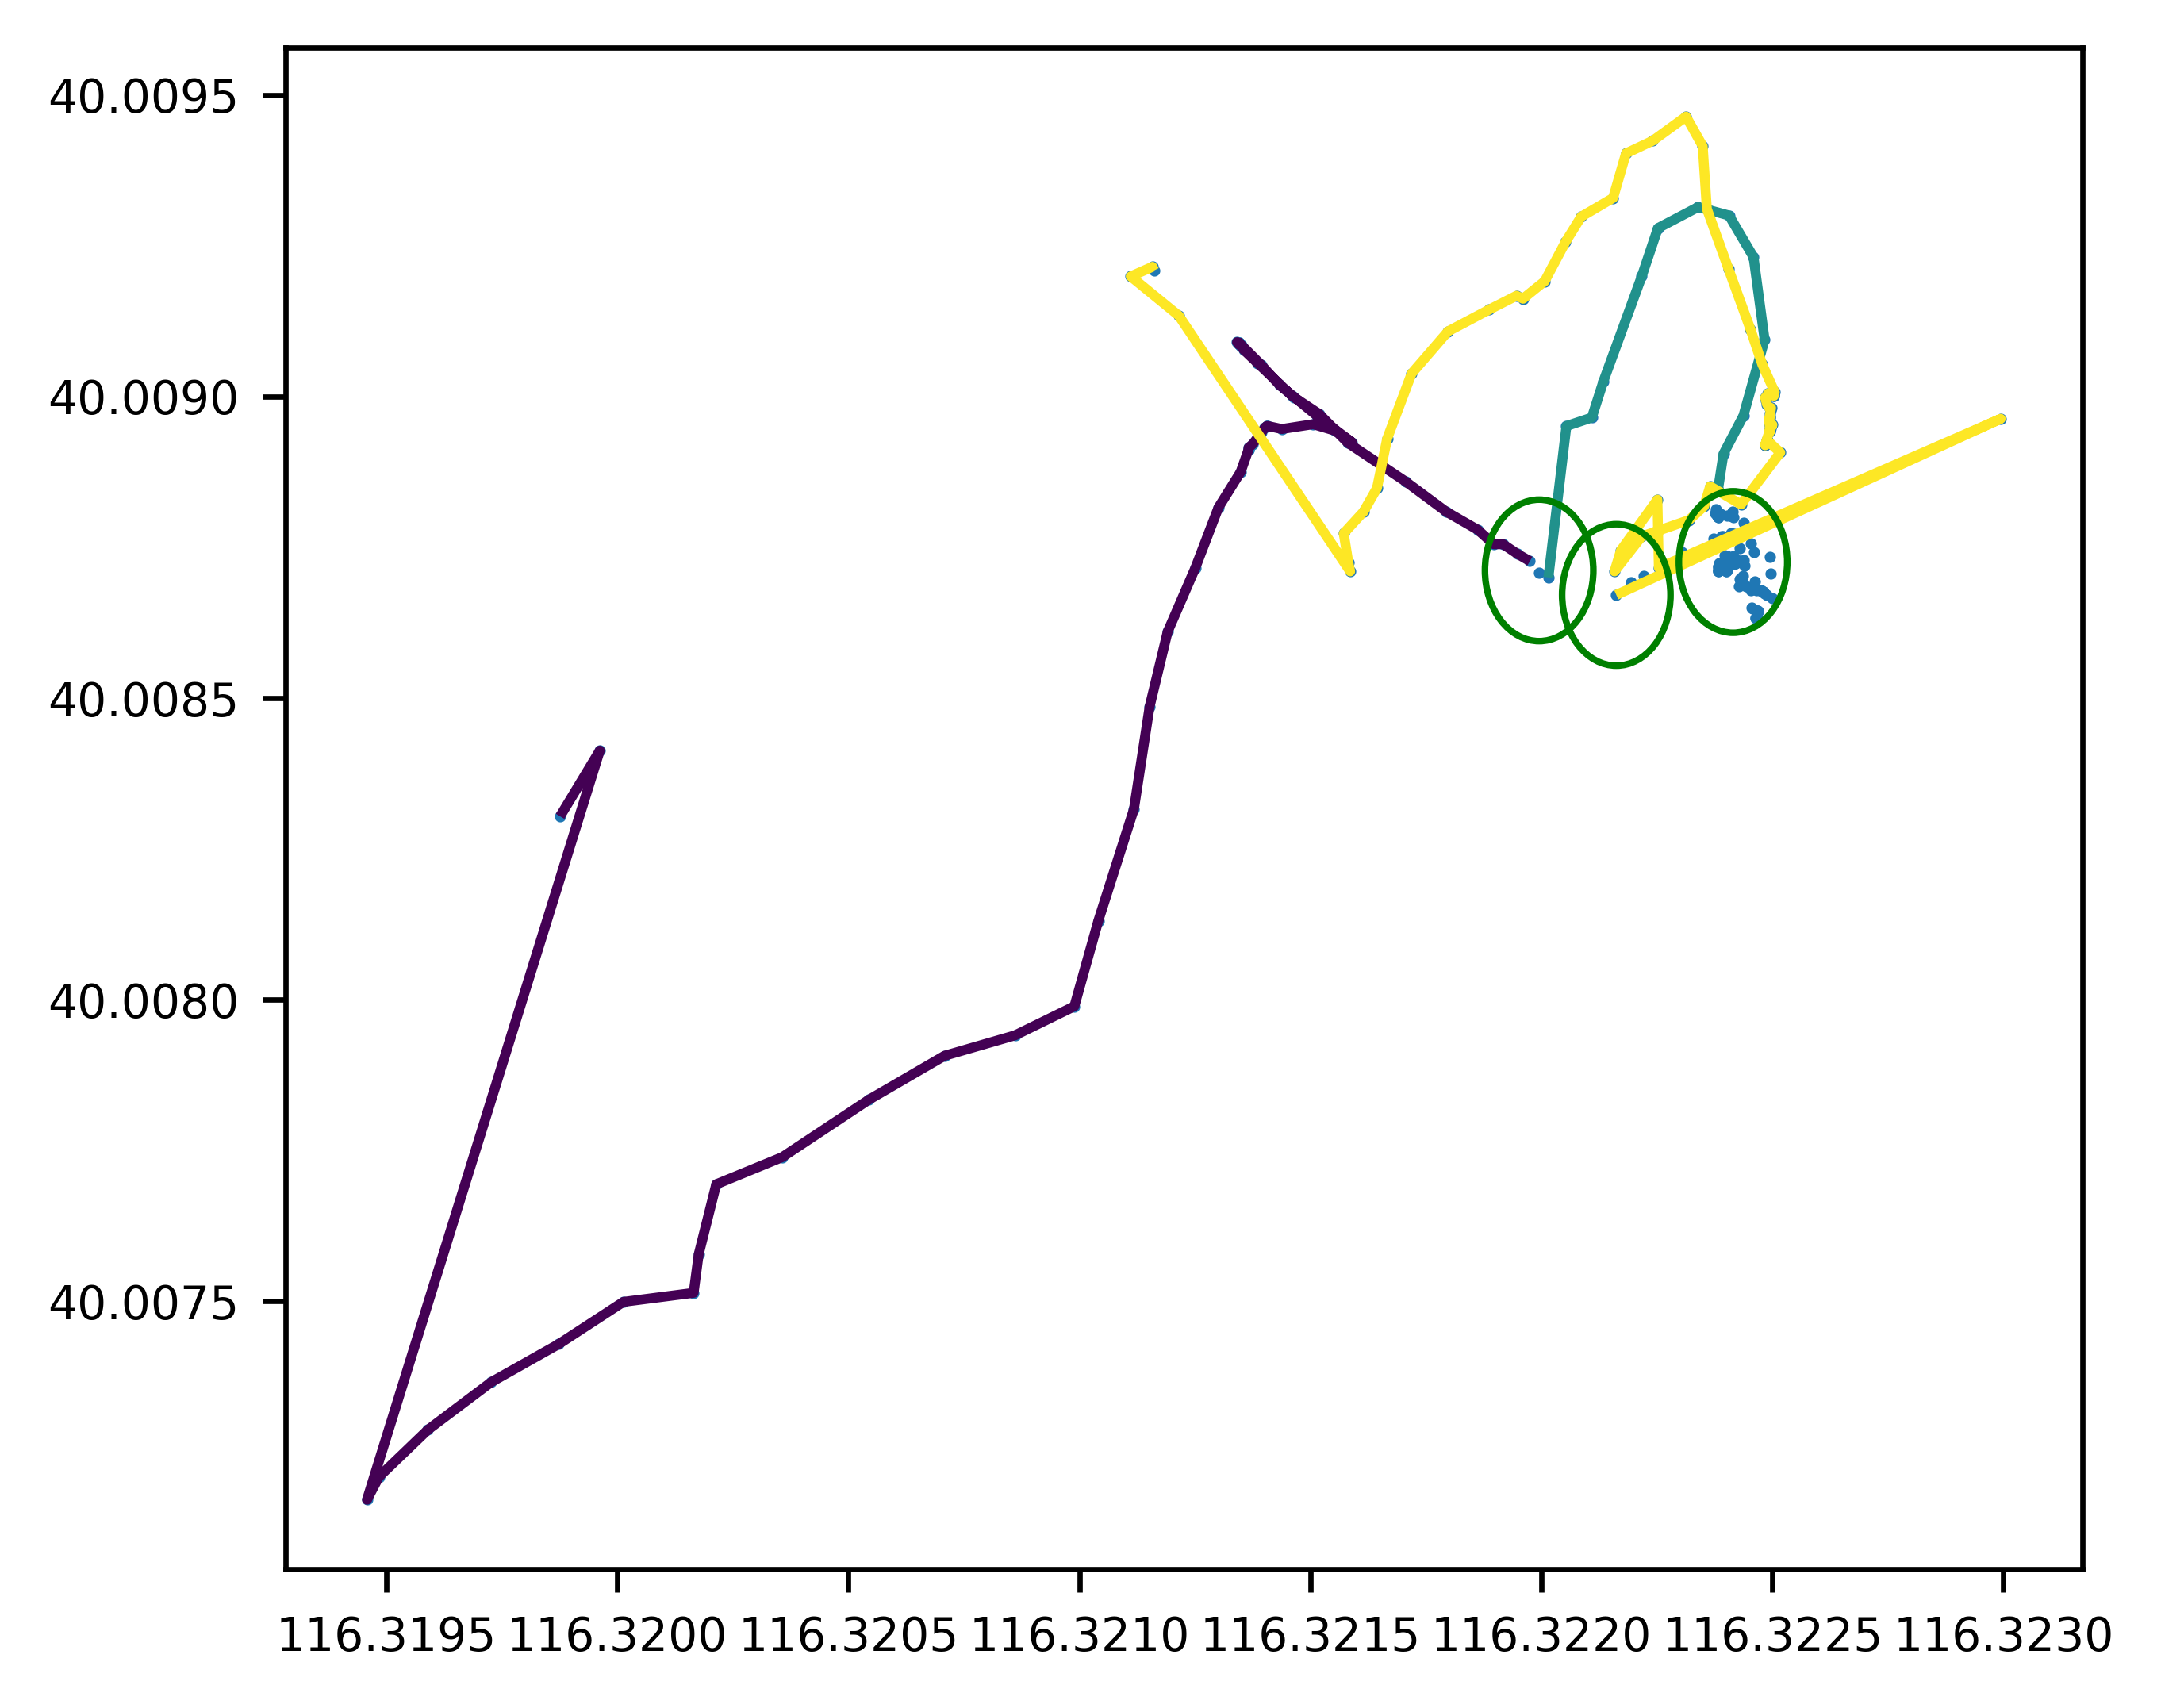

In [25]:
tpls.as_triplegs.plot(positionfixes=pfs,staypoints=stps, staypoints_radius=10)


The generated data can be exported as csv files and reused for further processing directly in trackintel or any other framework. Within python it is probably the easiest way just to keep the GeoDataFrames.

In [28]:
pfs.as_positionfixes.to_csv('./out/pfs_tutorial.csv')
stps.as_staypoints.to_csv('./out/stps_tutorial.csv')
tpls.as_triplegs.to_csv('./out/tpls_tutorial.csv')